[-0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2
  0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8
  0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4
  1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.
  2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6
  2.65  2.7   2.75  2.8   2.85  2.9   2.95  3.    3.05  3.1   3.15  3.2
  3.25  3.3   3.35  3.4   3.45  3.5   3.55  3.6   3.75  3.8   3.85  3.9
  3.95  4.  ]
86
[9695 9229 9695 6311 8834   89 1549 2369  146 7117 6849 6849 6849 8021
 8021 8021 8021 8021 8021 6104 6104 6104 6104 6517 6517 6104 6104 6104
 6104 6104 6104 6104 6104 6104 6517 6104 6104 8021 6104 6104 8021 6104
 8021 6517 6517 8021 8021 8021 6517 6104 5734 8021 6104 8021 8021 6517
 6517 6104 8021 8021 6517 6104 8021 6517 6517 6104 8021 6517 6104 6517
 3776 4115 6104 3776 3776 5734 8021 3776 8376 5734 5734 6104 6104 6104
 6517 6104]
86
9695
chi2: 0.005654
9229
chi2: 0.004002

/tmp/ipykernel_3665/3034176205.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


6104
chi2: 0.004840
6104
chi2: 0.006194
6517
chi2: 0.006009
6517
chi2: 0.005635
6104
chi2: 0.004189
6104
chi2: 0.004680
6104
chi2: 0.007412


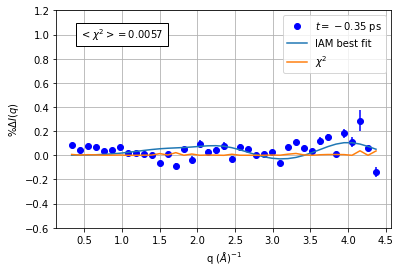

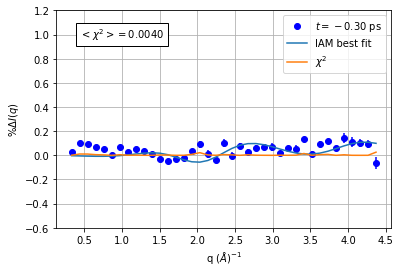

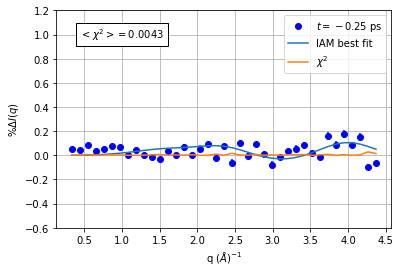

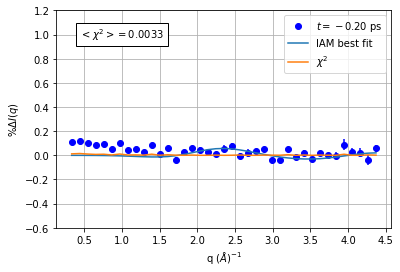

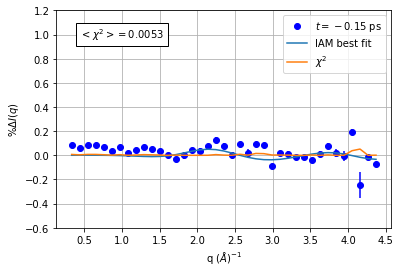

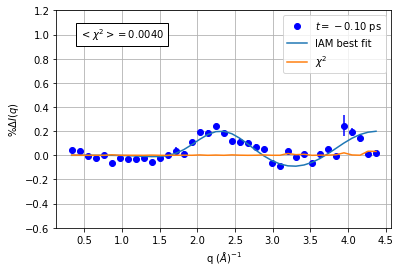

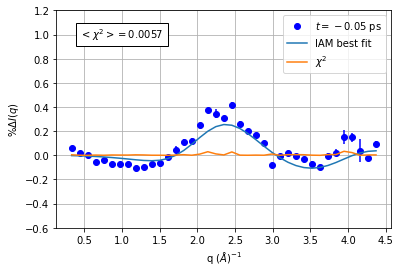

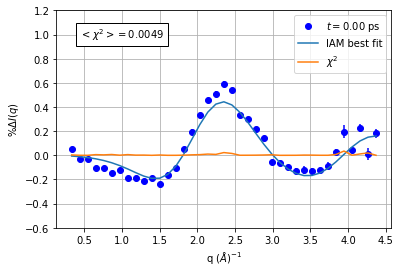

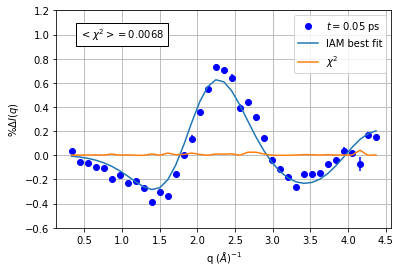

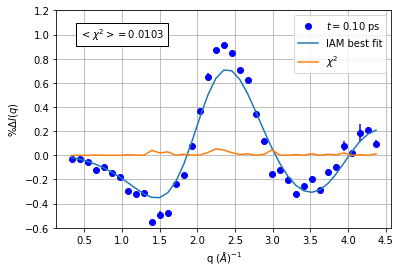

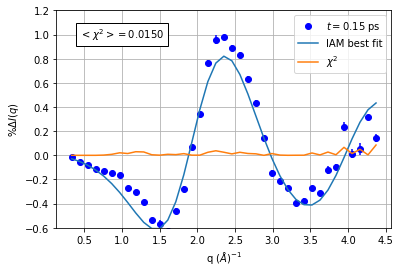

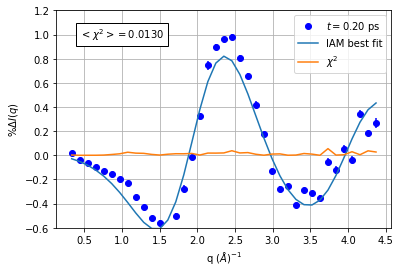

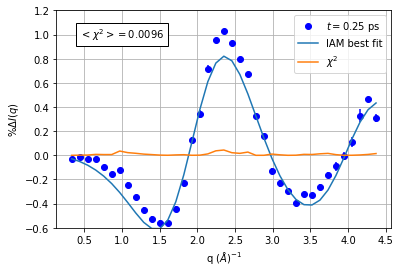

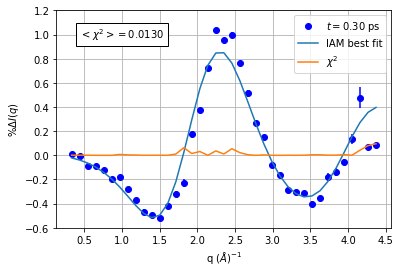

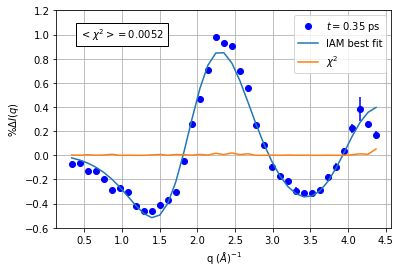

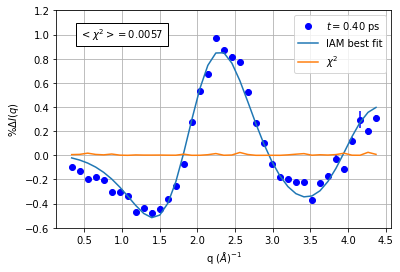

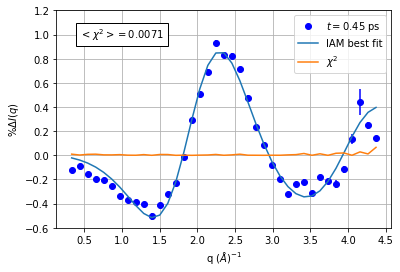

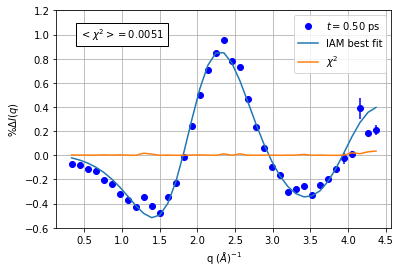

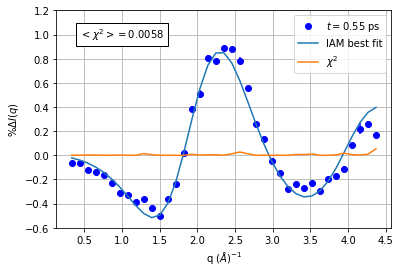

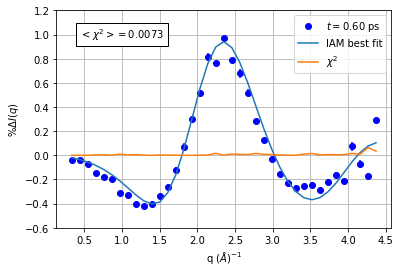

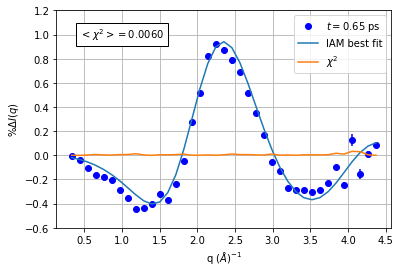

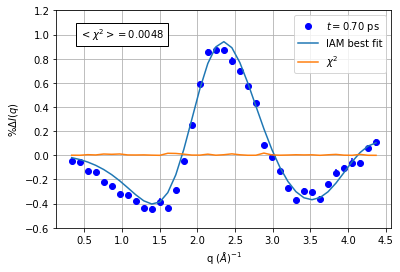

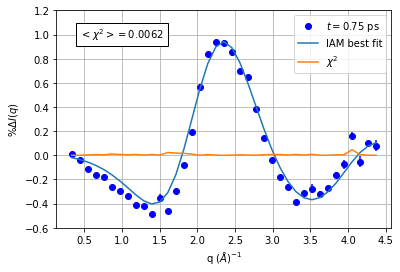

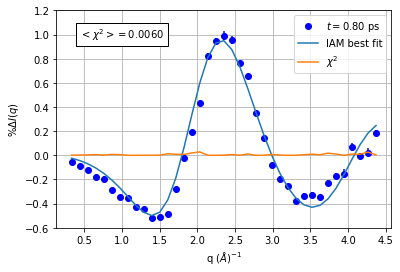

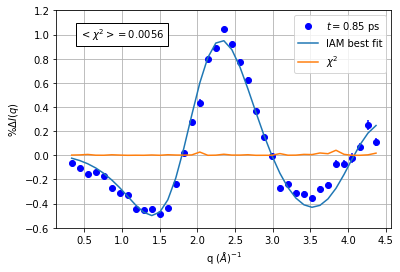

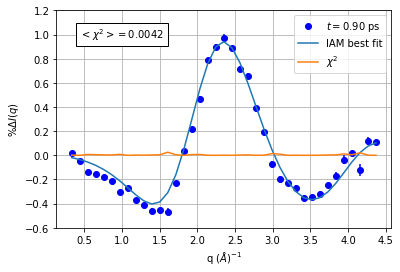

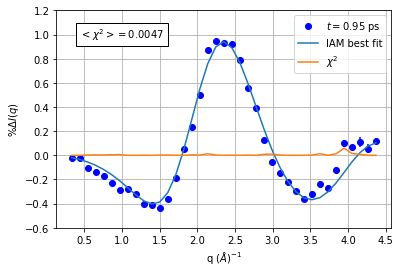

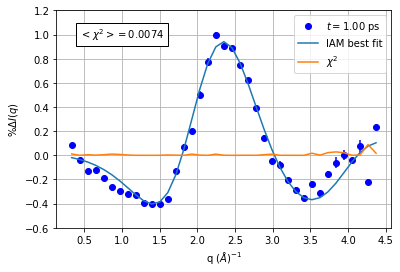

In [91]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

#for k in range(17, 48):
N = 10000
subtitle = 'mode%i' %k
subtitle = 'vstrongmodes'

chi2_file = np.load('../data/chi2_%i_%s.npz' % (N, subtitle))
chi2_array = chi2_file['chi2']
#pcd_new = chi2_file['pcd']
#a_factor = chi2_file['a_factor']
#nt = 99
#for t in range(nt):
#    print(np.argmin(chi2_array[:, t]))
#    print(np.min(chi2_array[:, t]))
# load distances
#f100 = np.load('../distances_10000.npy')
#c0c1 = f100[0, 1, :]

# load IAM
f = np.load('../data/iam_arrays_%i_%s.npz' % (N, subtitle))
q = f['q']
pcd = f['pcd']

# load experiment data
datafile = '../data/NMM_exp_dataset.mat'
mat = scipy.io.loadmat(datafile)
q_exp = np.squeeze(mat['q'])
t_exp = np.squeeze(mat['t'])
pcd_exp = mat['iso']
errors = mat['iso_stdx']
i_pre_t0 = 13
t_exp = t_exp[i_pre_t0:]  # remove before t = 0
pcd_exp = pcd_exp[:, i_pre_t0:]
errors = errors[:, i_pre_t0:]

print(t_exp)
print(len(t_exp))

argmin_array = np.argmin(chi2_array[:, :], axis=0)
print(argmin_array)
print(len(argmin_array))


factor = 0.057

for t in range(0, 28):
    time_step = t
    i = argmin_array[time_step]
    print(i)
    chi2 = chi2_array[i, time_step]
    print('chi2: %f' % chi2)
    #fig, ax = plt.figure()
    plt.figure()
    experiment = pcd_exp[:, time_step]
    plt.plot(q, experiment, 'bo')
    plt.errorbar(q, experiment, 
                 yerr=errors[:, time_step], 
                 xerr=None, fmt='none', ecolor='b')
    theory = factor * pcd[:, i]
    plt.plot(q, theory)
    plt.plot(q, (theory - experiment)**2)
    plt.xlabel('q $({\AA})^{-1}$')
    plt.ylabel('$\%\Delta I(q)$')
    plt.ylim((-0.6, 1.2))
    plt.grid()
    plt.legend(('$t =%3.2f$ ps' % t_exp[time_step],
                'IAM best fit',
                '$\chi^2$'))
    ypos = 1
    xpos = 1
    plt.text(xpos, ypos, '$<\chi^2> = %6.4f$' % chi2, 
             horizontalalignment='center',
             verticalalignment='center',
             bbox=dict(facecolor='white', alpha=1.0))
    fname = '%i_%s_%3.2f.png' % (N, subtitle, t_exp[time_step])
    plt.savefig(fname, dpi=150, facecolor='w', 
            edgecolor='w', orientation='portrait', 
            format='png', transparent=False, 
            bbox_inches='tight', pad_inches=0.1, 
            metadata=None)

### 